# Phase One

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score

In [81]:
# import raw travel data
travel = pd.read_csv('data/raw_data/ONTIME_REPORTING_01.csv', index_col = False)
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_02.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_03.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_04.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_05.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_06.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_07.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_08.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_09.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_10.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_11.csv', index_col = False))
travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_12.csv', index_col = False))
travel

/var/folders/bk/5jwcygx13h7gxxn13v10g1yr0000gn/T/ipykernel_26463/1524029062.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_02.csv', index_col = False))
/var/folders/bk/5jwcygx13h7gxxn13v10g1yr0000gn/T/ipykernel_26463/1524029062.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_03.csv', index_col = False))
/var/folders/bk/5jwcygx13h7gxxn13v10g1yr0000gn/T/ipykernel_26463/1524029062.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  travel = travel.append(pd.read_csv('data/raw_data/ONTIME_REPORTING_04.csv', index_col = False))
/var/folders/bk/5jwcygx13h7gxxn13v10g1yr0000gn/T/ipykernel_26

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,1,6,7,9E,N8694A,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,37.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7,1,9E,N8970D,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,32.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8,2,9E,N820AY,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,39.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9,3,9E,N840AY,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,37.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10,4,9E,N8969A,3280,10397,ATL,"Atlanta, GA",11150,...,47.0,41.0,83.0,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625758,12,31,2,B6,N193JB,846,13204,MCO,"Orlando, FL",15070,...,163.0,151.0,989.0,4,52.0,0.0,0.0,0.0,0.0,NaN
625759,12,31,2,B6,N304JB,854,11278,DCA,"Washington, DC",10721,...,90.0,79.0,399.0,2,NaN,NaN,NaN,NaN,NaN,NaN
625760,12,31,2,B6,N193JB,860,14100,PHL,"Philadelphia, PA",10721,...,85.0,59.0,280.0,2,NaN,NaN,NaN,NaN,NaN,NaN
625761,12,31,2,B6,N563JB,861,10721,BOS,"Boston, MA",14843,...,242.0,216.0,1674.0,7,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# change delays into binary

# turn CARRIER_DELAY into binary
not_null_mask = travel['CARRIER_DELAY'].notnull()
travel['CARRIER_DELAY'] = travel['CARRIER_DELAY'].notnull().astype(int)

# turn WEATHER_DELAY into binary
not_null_mask = travel['WEATHER_DELAY'].notnull()
travel['WEATHER_DELAY'] = travel['WEATHER_DELAY'].notnull().astype(int)

# turn NAS_DELAY into binary
not_null_mask = travel['NAS_DELAY'].notnull()
travel['NAS_DELAY'] = travel['NAS_DELAY'].notnull().astype(int)

# turn SECURITY_DELAY into binary
not_null_mask = travel['SECURITY_DELAY'].notnull()
travel['SECURITY_DELAY'] = travel['SECURITY_DELAY'].notnull().astype(int)

# turn LATE_AIRCRAFT_DELAY into binary
not_null_mask = travel['LATE_AIRCRAFT_DELAY'].notnull()
travel['LATE_AIRCRAFT_DELAY'] = travel['LATE_AIRCRAFT_DELAY'].notnull().astype(int)

In [83]:
# import raw weather data
weather = pd.read_csv('data/raw_data/airport_weather_2019.csv', index_col = False)


In [84]:
# split date
weather[['MONTH', 'DAY_OF_MONTH', 'YEAR']] = weather['DATE'].str.split('/', expand=True) #split dates mm/dd/yyy
weather[['YEAR_ALT', 'MONTH_ALT', 'DAY_OF_MONTH_ALT']] = weather['DATE'].str.split('-', expand=True) #split dates yyyy-mm-dd

#combine the two formats
weather['MONTH'] = weather['MONTH_ALT'].combine_first(weather['MONTH'])
weather['DAY_OF_MONTH'] = weather['DAY_OF_MONTH'].combine_first(weather['DAY_OF_MONTH_ALT'])
weather['YEAR'] = weather['YEAR'].combine_first(weather['YEAR_ALT'])

#drop alt columns
weather = weather.drop(['MONTH_ALT', 'DAY_OF_MONTH_ALT', 'YEAR_ALT'], axis=1)

weather

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11,MONTH,DAY_OF_MONTH,YEAR
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/1/2019,4.70,NaN,0.14,0.0,0.0,64.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/2/2019,4.92,NaN,0.57,0.0,0.0,56.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2019
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/3/2019,5.37,NaN,0.15,0.0,0.0,52.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2019
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/4/2019,12.08,NaN,1.44,0.0,0.0,56.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2019
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/5/2019,13.42,NaN,0.00,0.0,0.0,49.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38670,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-27,6.04,NaN,0.00,NaN,NaN,68.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,27,2019
38671,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-28,5.37,NaN,0.06,NaN,NaN,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,28,2019
38672,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-29,7.61,NaN,0.10,NaN,NaN,70.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,29,2019
38673,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-30,5.82,NaN,0.02,NaN,NaN,68.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,30,2019


In [85]:
weather['MONTH'].dtype

dtype('O')

In [86]:
# convert dates to numeric
weather[['MONTH', 'DAY_OF_MONTH', 'YEAR']] = weather[['MONTH', 'DAY_OF_MONTH', 'YEAR']].astype('int64')

In [87]:
# fill empty data for weather
weather[['WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',  'WT10', 'WT11']] = weather[['WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',  'WT10', 'WT11']].fillna(0)

In [88]:
# import airport data

airport = pd.read_csv('data/raw_data/airports_list.csv', index_col = False) 
airport

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US"
1,10257,Albany International,"Albany, NY","ALBANY INTERNATIONAL AIRPORT, NY US"
2,10140,Albuquerque International Sunport,"Albuquerque, NM","ALBUQUERQUE INTERNATIONAL AIRPORT, NM US"
3,10299,Anchorage International,"Anchorage, AK","ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A..."
4,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...
...,...,...,...,...
92,15370,Tulsa International,"Tulsa, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
93,12264,Washington Dulles International,"Washington, DC","WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US"
94,13851,Will Rogers World,"Oklahoma City, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
95,12191,William P Hobby,"Houston, TX","HOUSTON WILLIAM P HOBBY AIRPORT, TX US"


In [89]:
# add origin airport name from airport list to travel data set
travel = travel.merge(airport[['ORIGIN_AIRPORT_ID', 'NAME']], 
                        left_on='ORIGIN_AIRPORT_ID', right_on='ORIGIN_AIRPORT_ID', 
                        how='left', suffixes=('', '_airport'))

# Rename the merged column 'NAME' to 'ORIGIN_AIRPORT_NAME'
travel = travel.rename(columns={'NAME': 'ORIGIN_AIRPORT_NAME'})

# add destination airport name from airport list to travel data set
travel = travel.merge(airport[['ORIGIN_AIRPORT_ID', 'NAME']], 
                        left_on='DEST_AIRPORT_ID', right_on='ORIGIN_AIRPORT_ID', 
                        how='left', suffixes=('', '_airport'))

# Rename the merged column 'NAME' to 'DEST_AIRPORT_NAME'
travel = travel.rename(columns={'NAME': 'DEST_AIRPORT_NAME'})



In [90]:
travel.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_TIME_BLK', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_TIME_BLK', 'CANCELLED',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 32',
       'ORIGIN_AIRPORT_NAME', 'ORIGIN_AIRPORT_ID_airport',
       'DEST_AIRPORT_NAME'],
      dtype='object')

### Begin creating master data set with WEATHER_DELAY as target variable

In [91]:
# add travel data
travel_temp = travel[['MONTH', 'DAY_OF_MONTH','OP_UNIQUE_CARRIER', 'TAIL_NUM','ORIGIN_AIRPORT_NAME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_NAME', 'DEST_AIRPORT_ID','WEATHER_DELAY']] 

# add weather data
weather_temp = weather[['MONTH', 'DAY_OF_MONTH', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG','TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09','WT10', 'WT11']]

In [92]:
# First merge
df_1 = pd.merge(travel_temp, weather_temp, left_on=['MONTH', 'DAY_OF_MONTH', 'ORIGIN_AIRPORT_NAME'], right_on=['MONTH', 'DAY_OF_MONTH', 'NAME'], how='left')
df_1.drop(columns=['NAME'], inplace=True)  # Drop duplicate column

df_1 = df_1.rename(columns={
    'AWND': 'O_AWND',
    'PRCP': 'O_PRCP',
    'SNOW': 'O_SNOW',
    'SNWD': 'O_SNWD',
    'TAVG': 'O_TAVG',
    'TMAX': 'O_TMAX',
    'TMIN': 'O_TMIN',
    'WT01': 'O_WT01',
    'WT02': 'O_WT02',
    'WT03': 'O_WT03',
    'WT04': 'O_WT04',
    'WT05': 'O_WT05',
    'WT06': 'O_WT06',
    'WT07': 'O_WT07',
    'WT08': 'O_WT08',
    'WT09': 'O_WT09',
    'WT10': 'O_WT10',
    'WT11': 'O_WT11'
})


# Second merge
df_1 = pd.merge(df_1, weather_temp, left_on=['MONTH', 'DAY_OF_MONTH', 'DEST_AIRPORT_NAME'], right_on=['MONTH', 'DAY_OF_MONTH', 'NAME'], how='left')
df_1.drop(columns=['NAME'], inplace=True)  # Drop duplicate column

# Rename columns from the second merge
df_1 = df_1.rename(columns={
    'AWND': 'D_AWND',
    'PRCP': 'D_PRCP',
    'SNOW': 'D_SNOW',
    'SNWD': 'D_SNWD',
    'TAVG': 'D_TAVG',
    'TMAX': 'D_TMAX',
    'TMIN': 'D_TMIN',
    'WT01': 'D_WT01',
    'WT02': 'D_WT02',
    'WT03': 'D_WT03',
    'WT04': 'D_WT04',
    'WT05': 'D_WT05',
    'WT06': 'D_WT06',
    'WT07': 'D_WT07',
    'WT08': 'D_WT08',
    'WT09': 'D_WT09',
    'WT10': 'D_WT10',
    'WT11': 'D_WT11'
})


df_1 = df_1.dropna() #remove missing data
df_1

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_ID,DEST_AIRPORT_NAME,DEST_AIRPORT_ID,WEATHER_DELAY,O_AWND,...,D_WT02,D_WT03,D_WT04,D_WT05,D_WT06,D_WT07,D_WT08,D_WT09,D_WT10,D_WT11
76,1,5,9E,N324PQ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0,10.74,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,1,12,9E,N313PQ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0,5.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,1,19,9E,N927XJ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0,8.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,1,20,9E,N932XJ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0,14.76,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,1,26,9E,N934XJ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0,5.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422018,12,31,B6,N279JB,"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",11278,"ORLANDO INTERNATIONAL AIRPORT, FL US",13204,0,7.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7422019,12,31,B6,N317JB,"ORLANDO INTERNATIONAL AIRPORT, FL US",13204,"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",11278,1,8.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7422022,12,31,B6,N646JB,"ORLANDO INTERNATIONAL AIRPORT, FL US",13204,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",11618,0,8.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7422029,12,31,B6,N633JB,"LAGUARDIA AIRPORT, NY US",12478,"SAVANNAH INTERNATIONAL AIRPORT, GA US",14685,0,9.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Begin creating master data set with DEP_DEL15 as target variable. Remove rows where CARRIER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY are true.

In [93]:
# add travel data
travel_temp = travel[['MONTH', 'DAY_OF_MONTH','OP_UNIQUE_CARRIER', 'TAIL_NUM','ORIGIN_AIRPORT_NAME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_NAME', 'DEST_AIRPORT_ID','DEP_DEL15', 'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']] 

# remove rows where CARRIER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY are true.
travel_temp = travel_temp[~((travel_temp['CARRIER_DELAY'] == 1) & 
                   (travel_temp['NAS_DELAY'] == 1) & 
                   (travel_temp['SECURITY_DELAY'] == 1) & 
                   (travel_temp['LATE_AIRCRAFT_DELAY'] == 1))]

# remove CARRIER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY columns
travel_temp = travel_temp.drop(columns=['CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])

# add weather data
weather_temp = weather[['MONTH', 'DAY_OF_MONTH', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG','TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09','WT10', 'WT11']]

In [94]:
# First merge
df_2 = pd.merge(travel_temp, weather_temp, left_on=['MONTH', 'DAY_OF_MONTH', 'ORIGIN_AIRPORT_NAME'], right_on=['MONTH', 'DAY_OF_MONTH', 'NAME'], how='left')
df_2.drop(columns=['NAME'], inplace=True)  # Drop duplicate column

df_2 = df_2.rename(columns={
    'AWND': 'O_AWND',
    'PRCP': 'O_PRCP',
    'SNOW': 'O_SNOW',
    'SNWD': 'O_SNWD',
    'TAVG': 'O_TAVG',
    'TMAX': 'O_TMAX',
    'TMIN': 'O_TMIN',
    'WT01': 'O_WT01',
    'WT02': 'O_WT02',
    'WT03': 'O_WT03',
    'WT04': 'O_WT04',
    'WT05': 'O_WT05',
    'WT06': 'O_WT06',
    'WT07': 'O_WT07',
    'WT08': 'O_WT08',
    'WT09': 'O_WT09',
    'WT10': 'O_WT10',
    'WT11': 'O_WT11'
})


# Second merge
df_2 = pd.merge(df_2, weather_temp, left_on=['MONTH', 'DAY_OF_MONTH', 'DEST_AIRPORT_NAME'], right_on=['MONTH', 'DAY_OF_MONTH', 'NAME'], how='left')
df_2.drop(columns=['NAME'], inplace=True)  # Drop duplicate column

# Rename columns from the second merge
df_2 = df_2.rename(columns={
    'AWND': 'D_AWND',
    'PRCP': 'D_PRCP',
    'SNOW': 'D_SNOW',
    'SNWD': 'D_SNWD',
    'TAVG': 'D_TAVG',
    'TMAX': 'D_TMAX',
    'TMIN': 'D_TMIN',
    'WT01': 'D_WT01',
    'WT02': 'D_WT02',
    'WT03': 'D_WT03',
    'WT04': 'D_WT04',
    'WT05': 'D_WT05',
    'WT06': 'D_WT06',
    'WT07': 'D_WT07',
    'WT08': 'D_WT08',
    'WT09': 'D_WT09',
    'WT10': 'D_WT10',
    'WT11': 'D_WT11'
})


df_2 = df_2.dropna() #remove missing data
df_2

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_ID,DEST_AIRPORT_NAME,DEST_AIRPORT_ID,DEP_DEL15,O_AWND,...,D_WT02,D_WT03,D_WT04,D_WT05,D_WT06,D_WT07,D_WT08,D_WT09,D_WT10,D_WT11
64,1,5,9E,N324PQ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0.0,10.74,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1,12,9E,N313PQ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0.0,5.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,1,19,9E,N927XJ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0.0,8.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,1,20,9E,N932XJ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0.0,14.76,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,1,26,9E,N934XJ,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",12451,"LAGUARDIA AIRPORT, NY US",12953,0.0,5.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032758,12,31,B6,N603JB,"ORLANDO INTERNATIONAL AIRPORT, FL US",13204,"SALT LAKE CITY INTERNATIONAL AIRPORT, UT US",14869,0.0,8.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6032767,12,31,B6,N279JB,"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",11278,"ORLANDO INTERNATIONAL AIRPORT, FL US",13204,0.0,7.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6032770,12,31,B6,N646JB,"ORLANDO INTERNATIONAL AIRPORT, FL US",13204,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",11618,0.0,8.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6032777,12,31,B6,N633JB,"LAGUARDIA AIRPORT, NY US",12478,"SAVANNAH INTERNATIONAL AIRPORT, GA US",14685,0.0,9.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Phase Two: Data Profiling

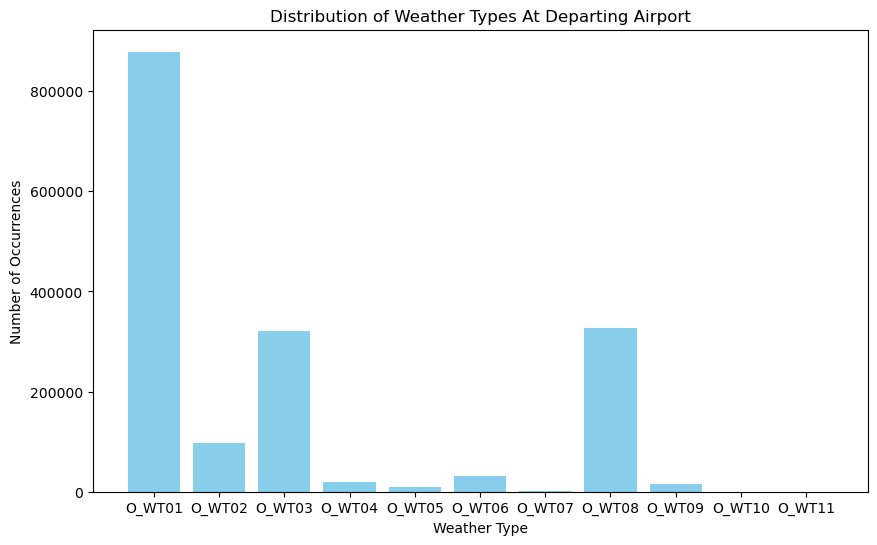

In [95]:
selected_columns = ['O_WT01', 'O_WT02', 'O_WT03', 'O_WT04', 'O_WT05', 'O_WT06', 'O_WT07', 'O_WT08', 'O_WT09','O_WT10', 'O_WT11']

# Count occurrences of "1" in selected columns
counts = df_1[selected_columns].apply(lambda x: x.value_counts().get(1, 0))

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(range(len(selected_columns)), counts.values, color='skyblue')

# Add column names as tick labels
plt.xticks(range(len(selected_columns)), selected_columns)

# Set y-axis tick format to display actual values
plt.ticklabel_format(style='plain', axis='y')  

# Add labels and title
plt.xlabel('Weather Type')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Weather Types At Departing Airport')

# Show the plot
plt.show()

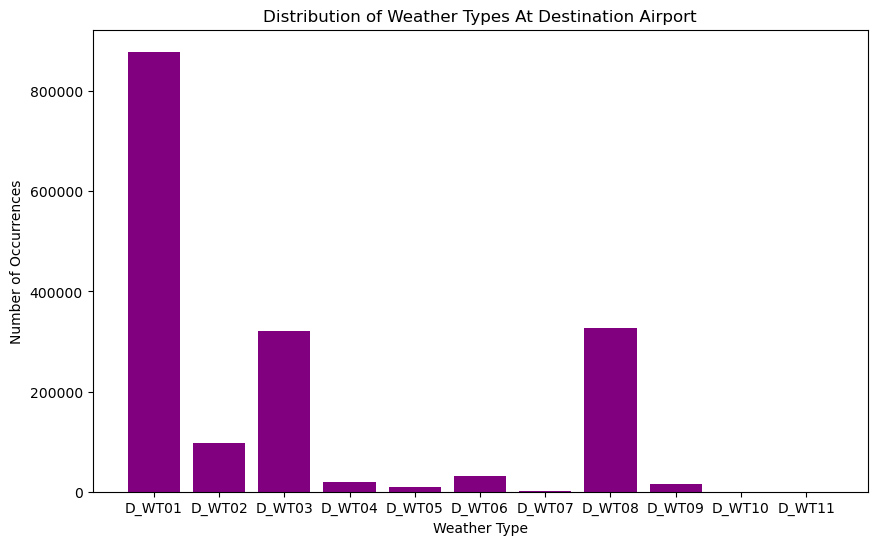

In [96]:
selected_columns = ['D_WT01', 'D_WT02', 'D_WT03', 'D_WT04', 'D_WT05', 'D_WT06', 'D_WT07', 'D_WT08', 'D_WT09','D_WT10', 'D_WT11']

# Count occurrences of "1" in selected columns
counts = df_1[selected_columns].apply(lambda x: x.value_counts().get(1, 0))

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(range(len(selected_columns)), counts.values, color='purple')

# Add column names as tick labels
plt.xticks(range(len(selected_columns)), selected_columns)

# Set y-axis tick format to display actual values
plt.ticklabel_format(style='plain', axis='y')  

# Add labels and title
plt.xlabel('Weather Type')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Weather Types At Destination Airport')

# Show the plot
plt.show()

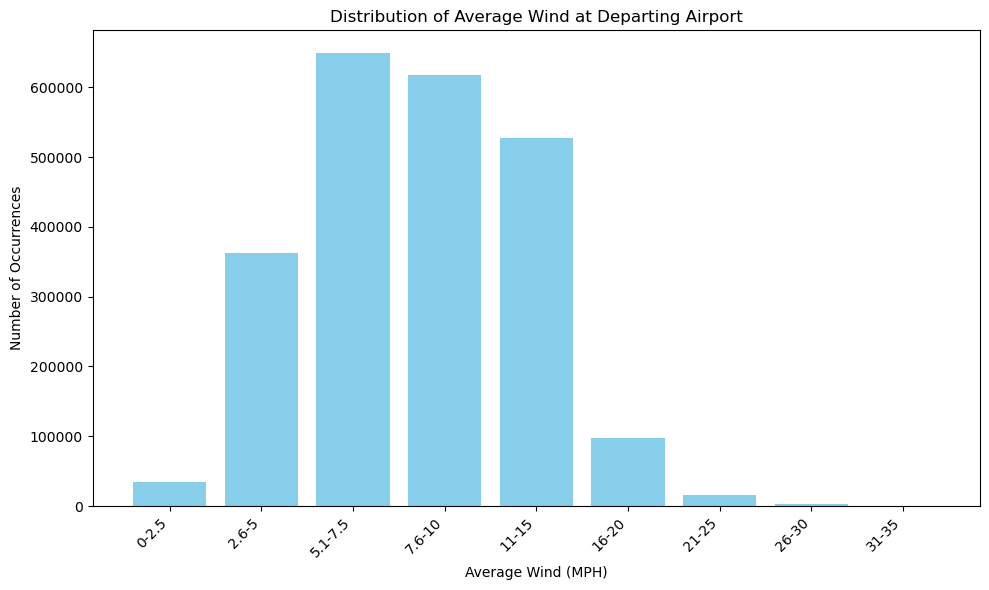

In [97]:
# Define bins and labels
bins = [0, 2.5, 5, 7.5, 10, 15, 20, 25, 30, 35]  # Range from 0 to 35 in bins of 5
labels = ['0-2.5', '2.6-5', '5.1-7.5', '7.6-10', '11-15', '16-20', '21-25', '26-30', '31-35']  # Labels for the bins

# Cut data into bins
wind_df = pd.cut(df_1['O_AWND'], bins=bins, labels=labels)

# Count occurrences of each category
value_counts = wind_df.value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(value_counts.index, value_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Average Wind (MPH)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Average Wind at Departing Airport')

# Set y-axis tick format to display actual values
plt.ticklabel_format(style='plain', axis='y')  

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


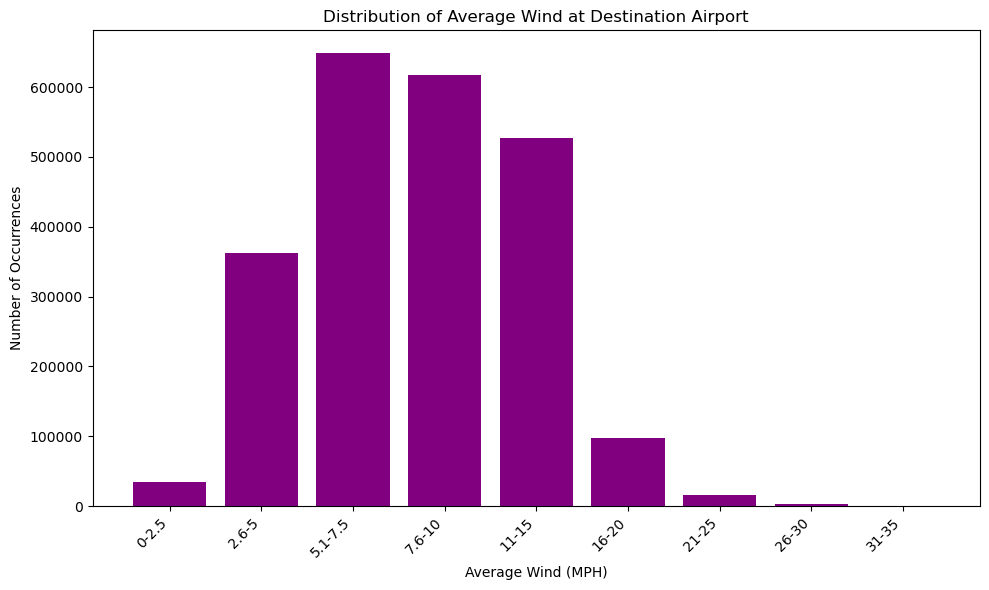

In [98]:
# Define bins and labels
bins = [0, 2.5, 5, 7.5, 10, 15, 20, 25, 30, 35]  # Range from 0 to 35 in bins of 5
labels = ['0-2.5', '2.6-5', '5.1-7.5', '7.6-10', '11-15', '16-20', '21-25', '26-30', '31-35']  # Labels for the bins

# Cut data into bins
wind_df = pd.cut(df_1['D_AWND'], bins=bins, labels=labels)

# Count occurrences of each category
value_counts = wind_df.value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(value_counts.index, value_counts.values, color='purple')

# Add labels and title
plt.xlabel('Average Wind (MPH)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Average Wind at Destination Airport')

# Set y-axis tick format to display actual values
plt.ticklabel_format(style='plain', axis='y')  

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


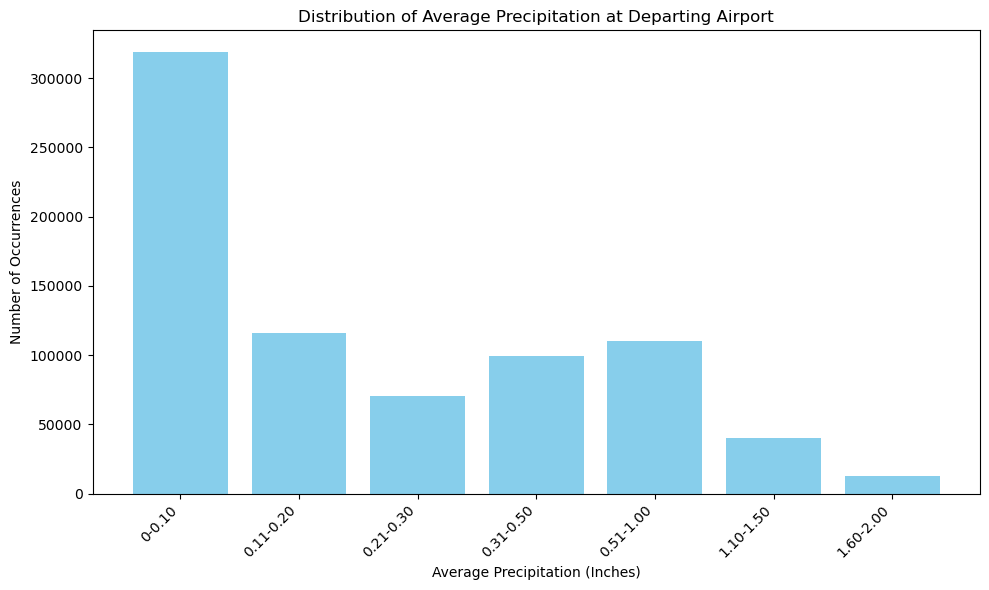

In [99]:
# Define bins and labels
bins = [0,0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0]  # Range from 0 to 2 in bins of 5
labels = ['0-0.10', '0.11-0.20', '0.21-0.30', '0.31-0.50','0.51-1.00', '1.10-1.50', '1.60-2.00']  # Labels for the bins

# Cut data into bins
prcp_df = pd.cut(df_1['O_PRCP'], bins=bins, labels=labels)

# Count occurrences of each category
value_counts = prcp_df.value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(value_counts.index, value_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Average Precipitation (Inches)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Average Precipitation at Departing Airport')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


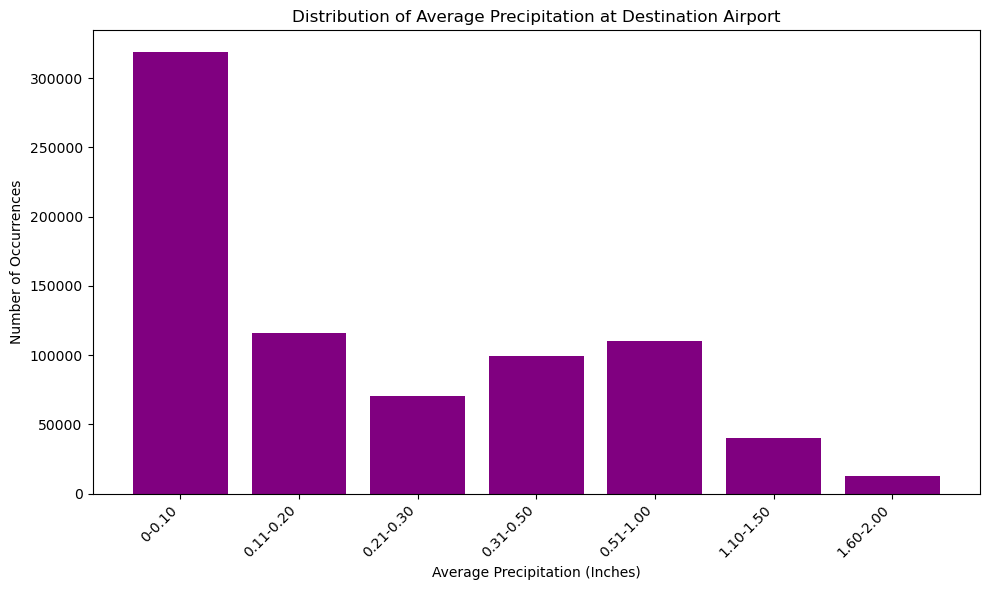

In [100]:
# Define bins and labels
bins = [0,0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0]  # Range from 0 to 2 in bins of 5
labels = ['0-0.10', '0.11-0.20', '0.21-0.30', '0.31-0.50','0.51-1.00', '1.10-1.50', '1.60-2.00']  # Labels for the bins

# Cut data into bins
prcp_df = pd.cut(df_1['D_PRCP'], bins=bins, labels=labels)

# Count occurrences of each category
value_counts = prcp_df.value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(value_counts.index, value_counts.values, color='purple')

# Add labels and title
plt.xlabel('Average Precipitation (Inches)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Average Precipitation at Destination Airport')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


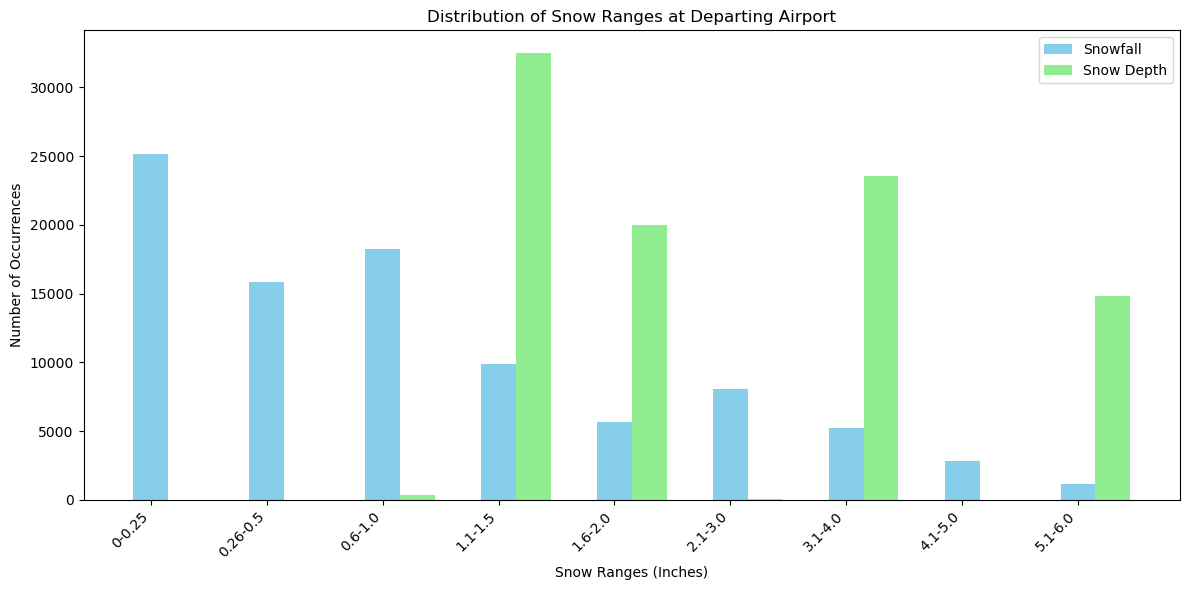

In [101]:
# Concatenate 'SNOW', and 'SNWD' into a single DataFrame
temperature_df = pd.concat([df_1['O_SNOW'], df_1['O_SNWD']], axis=1)
temperature_df.columns = ['Snowfall', 'Snow Depth']  # Rename columns for clarity

# Define bins and labels
bins = [0,0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0]  # Range from 0 to 5 in bins of 5
labels = ['0-0.25', '0.26-0.5','0.6-1.0', '1.1-1.5', '1.6-2.0', '2.1-3.0', '3.1-4.0', '4.1-5.0', '5.1-6.0']  # Labels for the bins

# Cut data into bins
temperature_df_bins = temperature_df.apply(lambda x: pd.cut(x, bins=bins, labels=labels))

# Count occurrences of each category
value_counts = temperature_df_bins.apply(pd.Series.value_counts).fillna(0).sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(range(len(value_counts.index)), value_counts['Snowfall'], width=0.3, label='Snowfall', color='skyblue')
plt.bar([x + 0.3 for x in range(len(value_counts.index))], value_counts['Snow Depth'], width=0.3, label='Snow Depth', color='lightgreen')

# Add labels and title
plt.xlabel('Snow Ranges (Inches)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Snow Ranges at Departing Airport')
plt.xticks(range(len(value_counts.index)), value_counts.index, rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off

# Show the plot
plt.show()


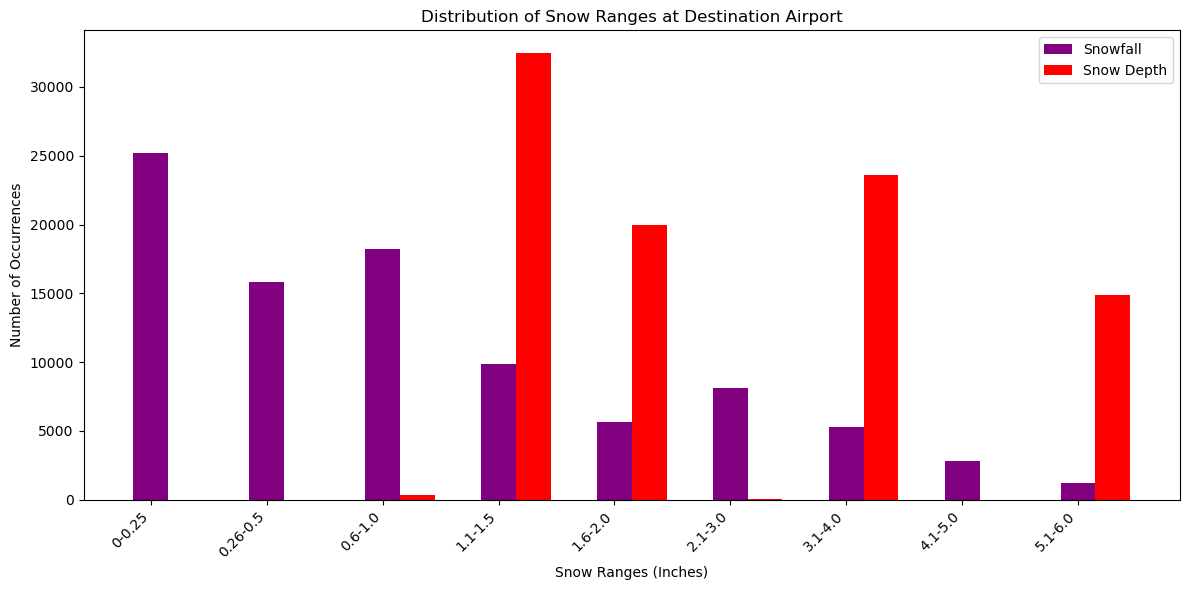

In [102]:
# Concatenate 'SNOW', and 'SNWD' into a single DataFrame
temperature_df = pd.concat([df_1['D_SNOW'], df_1['D_SNWD']], axis=1)
temperature_df.columns = ['Snowfall', 'Snow Depth']  # Rename columns for clarity

# Define bins and labels
bins = [0,0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0]  # Range from 0 to 5 in bins of 5
labels = ['0-0.25', '0.26-0.5','0.6-1.0', '1.1-1.5', '1.6-2.0', '2.1-3.0', '3.1-4.0', '4.1-5.0', '5.1-6.0']  # Labels for the bins

# Cut data into bins
temperature_df_bins = temperature_df.apply(lambda x: pd.cut(x, bins=bins, labels=labels))

# Count occurrences of each category
value_counts = temperature_df_bins.apply(pd.Series.value_counts).fillna(0).sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(range(len(value_counts.index)), value_counts['Snowfall'], width=0.3, label='Snowfall', color='purple')
plt.bar([x + 0.3 for x in range(len(value_counts.index))], value_counts['Snow Depth'], width=0.3, label='Snow Depth', color='red')

# Add labels and title
plt.xlabel('Snow Ranges (Inches)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Snow Ranges at Destination Airport')
plt.xticks(range(len(value_counts.index)), value_counts.index, rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off

# Show the plot
plt.show()


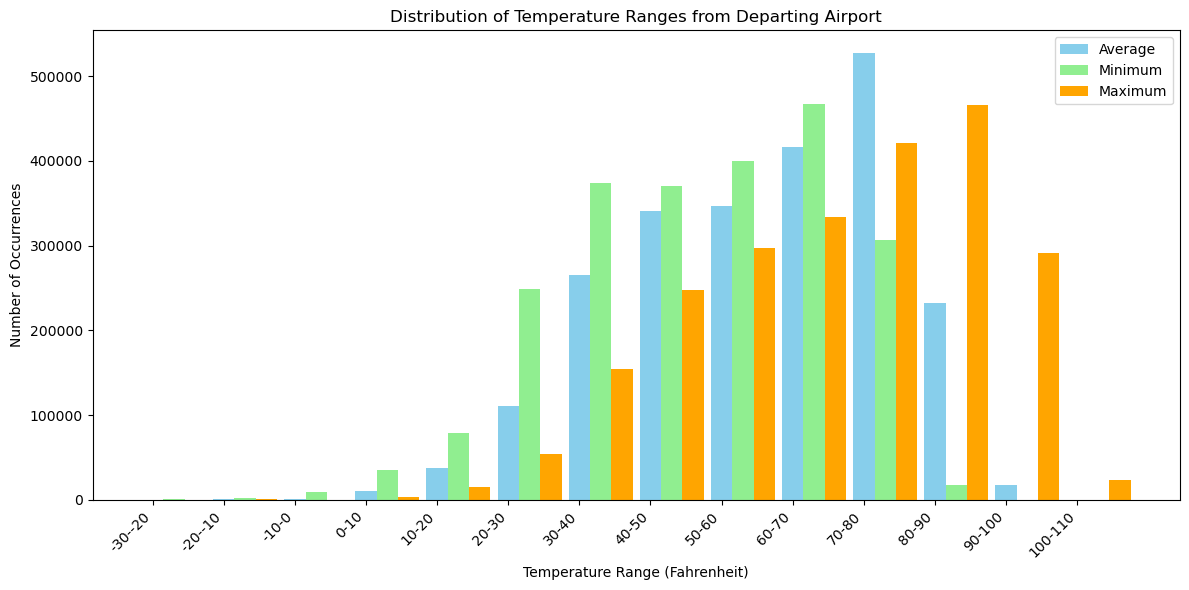

In [103]:
# Concatenate 'TAVG', 'TMIN', and 'TMAX' into a single DataFrame
temperature_df = pd.concat([df_1['O_TAVG'], df_1['O_TMIN'], df_1['O_TMAX']], axis=1)
temperature_df.columns = ['Average', 'Minimum', 'Maximum']  # Rename columns for clarity

# Define bins and labels
bins = list(range(-30, 120, 10))  # Range from -30 to 110 in bins of 10
labels = [f"{i}-{i+10}" for i in range(-30, 110, 10)]  # Labels for the bins

# Cut data into bins
temperature_df_bins = temperature_df.apply(lambda x: pd.cut(x, bins=bins, labels=labels))

# Count occurrences of each category
value_counts = temperature_df_bins.apply(pd.Series.value_counts).fillna(0).sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(range(len(value_counts.index)), value_counts['Average'], width=0.3, label='Average', color='skyblue')
plt.bar([x + 0.3 for x in range(len(value_counts.index))], value_counts['Minimum'], width=0.3, label='Minimum', color='lightgreen')
plt.bar([x + 0.6 for x in range(len(value_counts.index))], value_counts['Maximum'], width=0.3, label='Maximum', color='orange')

# Add labels and title
plt.xlabel('Temperature Range (Fahrenheit)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Temperature Ranges from Departing Airport')
plt.xticks(range(len(value_counts.index)), value_counts.index, rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off

# Show the plot
plt.show()


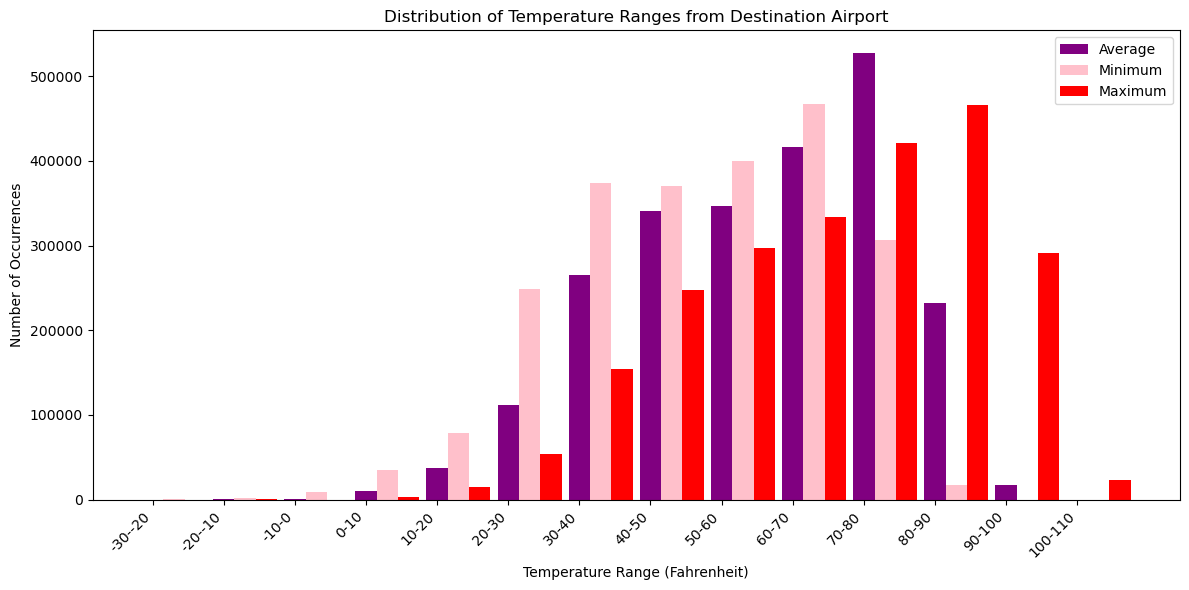

In [104]:
# Concatenate 'TAVG', 'TMIN', and 'TMAX' into a single DataFrame
temperature_df = pd.concat([df_1['D_TAVG'], df_1['D_TMIN'], df_1['D_TMAX']], axis=1)
temperature_df.columns = ['Average', 'Minimum', 'Maximum']  # Rename columns for clarity

# Define bins and labels
bins = list(range(-30, 120, 10))  # Range from -30 to 110 in bins of 10
labels = [f"{i}-{i+10}" for i in range(-30, 110, 10)]  # Labels for the bins

# Cut data into bins
temperature_df_bins = temperature_df.apply(lambda x: pd.cut(x, bins=bins, labels=labels))

# Count occurrences of each category
value_counts = temperature_df_bins.apply(pd.Series.value_counts).fillna(0).sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(range(len(value_counts.index)), value_counts['Average'], width=0.3, label='Average', color='purple')
plt.bar([x + 0.3 for x in range(len(value_counts.index))], value_counts['Minimum'], width=0.3, label='Minimum', color='pink')
plt.bar([x + 0.6 for x in range(len(value_counts.index))], value_counts['Maximum'], width=0.3, label='Maximum', color='red')

# Add labels and title
plt.xlabel('Temperature Range (Fahrenheit)')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Temperature Ranges from Destination Airport')
plt.xticks(range(len(value_counts.index)), value_counts.index, rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off

# Show the plot
plt.show()


Text(0.5, 1.0, 'Weather Delay: 1 is yes')

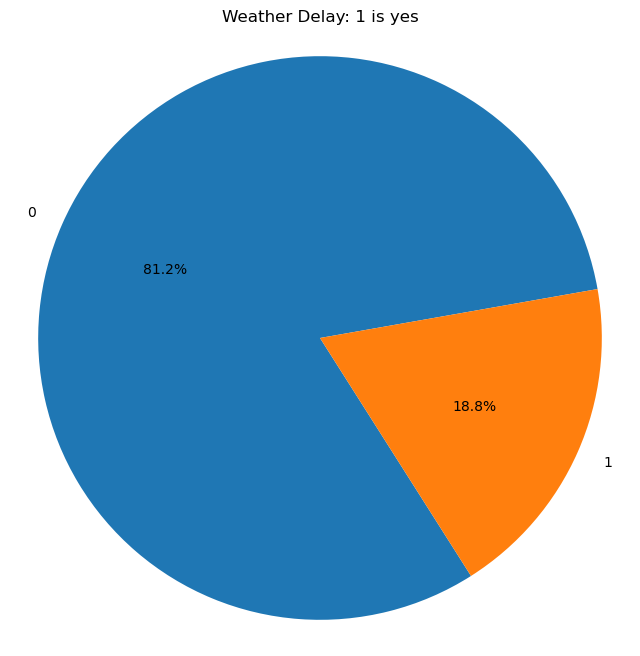

In [105]:
unique_values_weather_delay= df_1['WEATHER_DELAY'].value_counts(dropna=False)
plt.figure(figsize=(8, 8))
plt.pie(unique_values_weather_delay, labels=unique_values_weather_delay.index, autopct='%1.1f%%', startangle=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Weather Delay: 1 is yes')

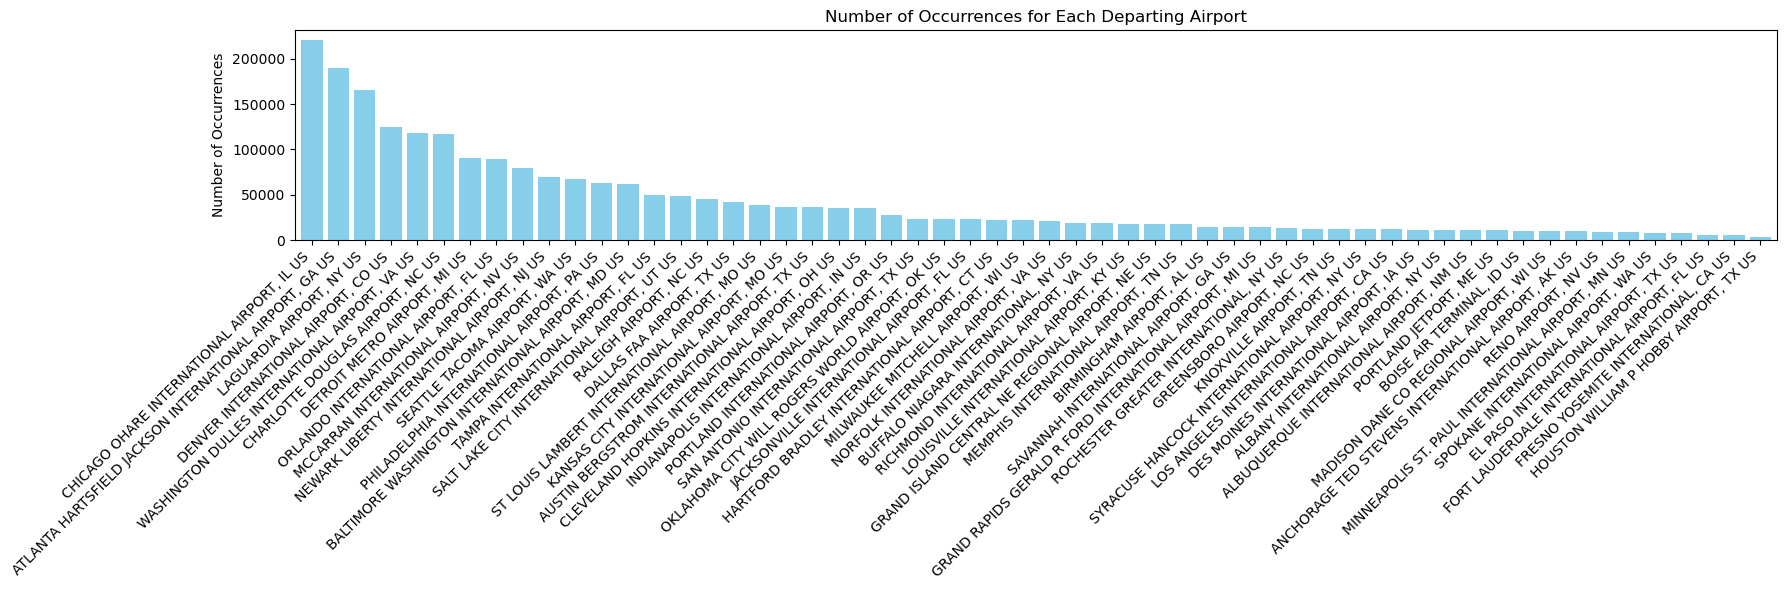

In [106]:
# Count occurrences of each name
O_name_counts = df_1['ORIGIN_AIRPORT_NAME'].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 6))  # Adjust figure size if needed
O_name_counts.plot(kind='bar', color='skyblue', width=0.8)  # Adjust the width as needed

# Add labels and title
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Departing Airport')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


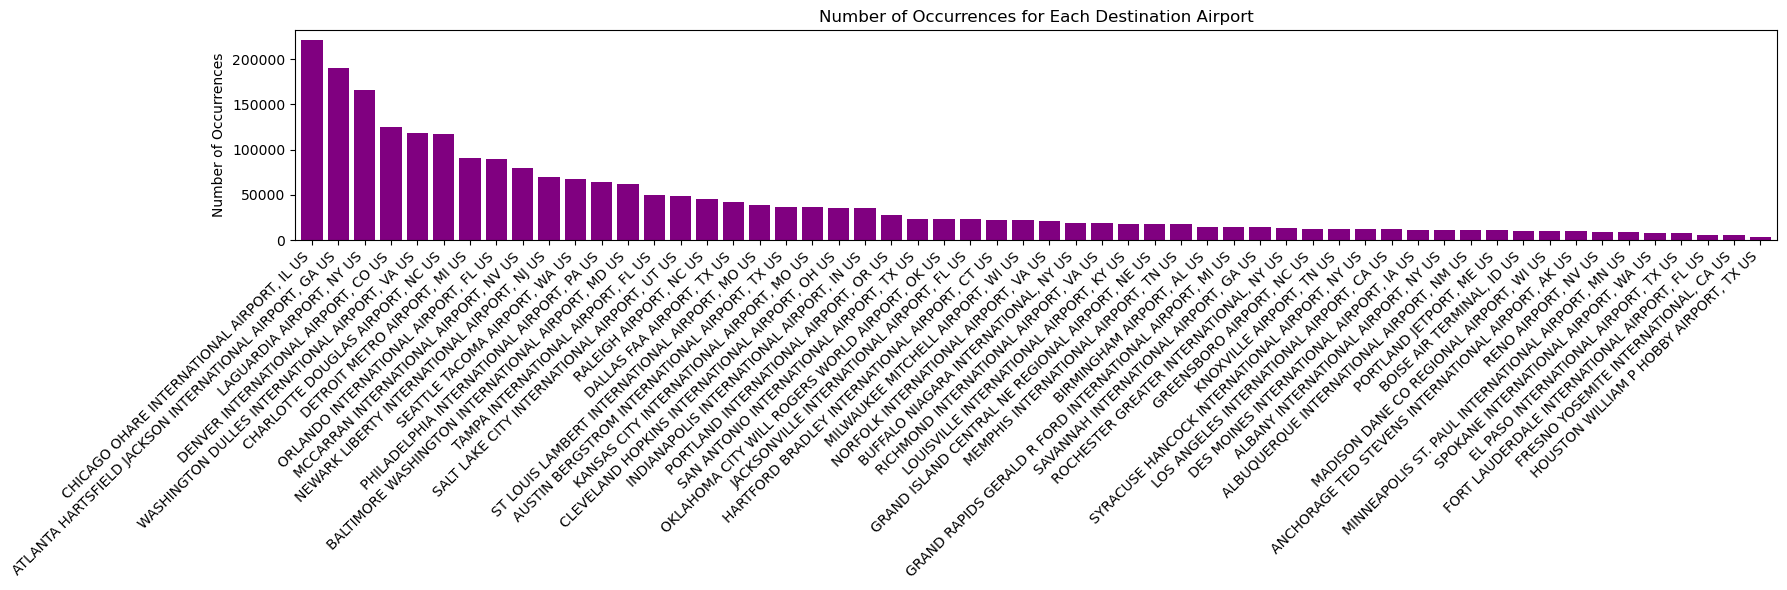

In [107]:
# Count occurrences of each name
D_name_counts = df_1['DEST_AIRPORT_NAME'].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 6))  # Adjust figure size if needed
D_name_counts.plot(kind='bar', color='purple', width=0.8)  # Adjust the width as needed

# Add labels and title
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Destination Airport')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


In [108]:
O_name_counts

CHICAGO OHARE INTERNATIONAL AIRPORT, IL US                 220509
ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US    190180
LAGUARDIA AIRPORT, NY US                                   165726
DENVER INTERNATIONAL AIRPORT, CO US                        124754
WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US             118041
CHARLOTTE DOUGLAS AIRPORT, NC US                           117464
DETROIT METRO AIRPORT, MI US                                90112
ORLANDO INTERNATIONAL AIRPORT, FL US                        89740
MCCARRAN INTERNATIONAL AIRPORT, NV US                       79749
NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US                 69882
SEATTLE TACOMA AIRPORT, WA US                               67392
PHILADELPHIA INTERNATIONAL AIRPORT, PA US                   63365
BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US           62304
TAMPA INTERNATIONAL AIRPORT, FL US                          49508
SALT LAKE CITY INTERNATIONAL AIRPORT, UT US                 48906
RALEIGH AI

In [109]:
D_name_counts

CHICAGO OHARE INTERNATIONAL AIRPORT, IL US                 220634
ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US    189940
LAGUARDIA AIRPORT, NY US                                   165748
DENVER INTERNATIONAL AIRPORT, CO US                        124374
WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US             117999
CHARLOTTE DOUGLAS AIRPORT, NC US                           117130
DETROIT METRO AIRPORT, MI US                                90126
ORLANDO INTERNATIONAL AIRPORT, FL US                        89726
MCCARRAN INTERNATIONAL AIRPORT, NV US                       79853
NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US                 70036
SEATTLE TACOMA AIRPORT, WA US                               67165
PHILADELPHIA INTERNATIONAL AIRPORT, PA US                   63646
BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US           62370
TAMPA INTERNATIONAL AIRPORT, FL US                          49431
SALT LAKE CITY INTERNATIONAL AIRPORT, UT US                 48967
RALEIGH AI

In [110]:
# adjust carrier code to airline name
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('WN', 'Southwest Airlines')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('DL', 'Delta Air Lines, Inc.')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('AA', 'American Airlines')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('OO', 'Skywest Airlines ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('UA', 'United Airlines, Inc. ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('YX', 'Republic Airlines ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('OH', 'Jetstream Intl ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('9E', 'Endeavor Air ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('AS', 'Alaska Airlines')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('B6', 'Jetblue Airways Corporation ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('MQ', 'Envoy Air')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('NK', 'Spirit Airlines, Inc. ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('F9', 'Frontier Airlines, Inc. ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('YV', 'Mesa Airlines, Inc. ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('EV', 'ExpressJet Airlines ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('G4', 'Allegiant Air LLC ')
df_1['OP_UNIQUE_CARRIER'] = df_1['OP_UNIQUE_CARRIER'].replace('HA', 'Hawaiian Airlines Inc.')

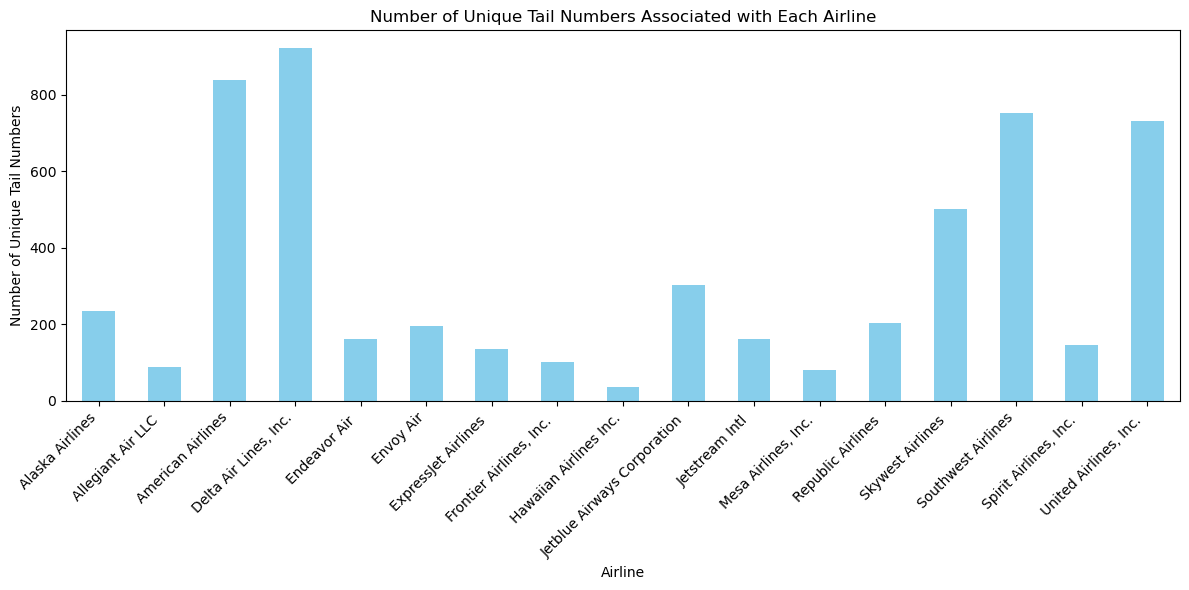

In [111]:
# Sample DataFrame
# Assuming df_1 is your DataFrame with columns 'airline' and 'tail_number'

# Group the DataFrame by 'airline' and count the number of unique tail numbers for each airline
airline_tail_counts = df_1.groupby('OP_UNIQUE_CARRIER')['TAIL_NUM'].nunique()

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
airline_tail_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Airline')
plt.ylabel('Number of Unique Tail Numbers')
plt.title('Number of Unique Tail Numbers Associated with Each Airline')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


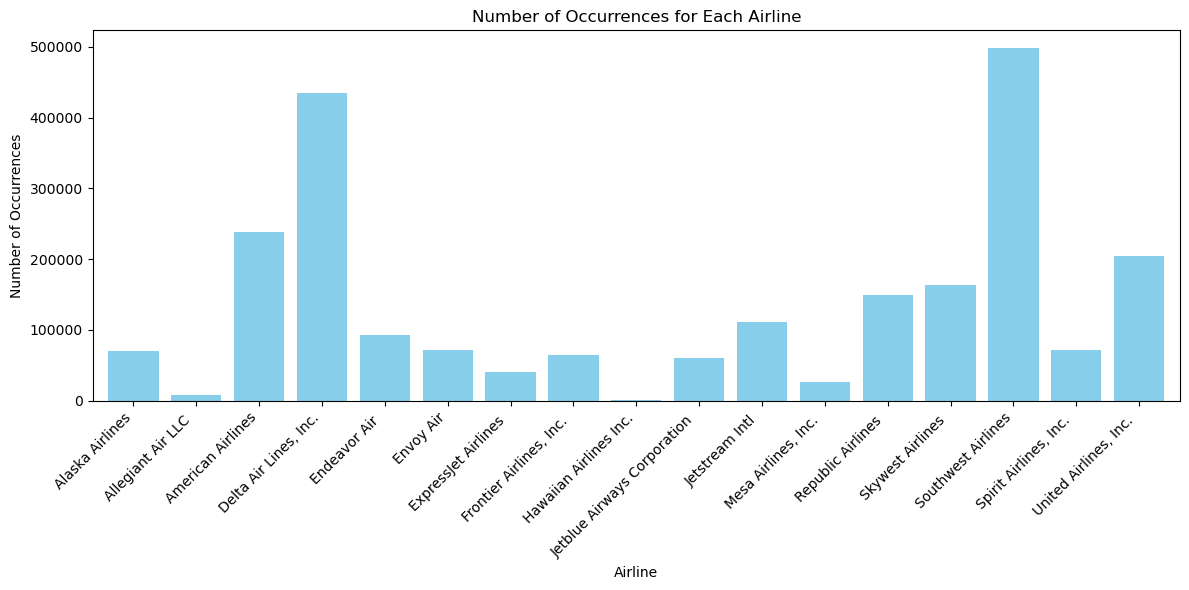

In [112]:
# Sample DataFrame
# Assuming df_1['OP_UNIQUE_CARRIER'] is your column of airline names

# Count occurrences of each name
name_counts = df_1['OP_UNIQUE_CARRIER'].value_counts()

# Sort the name_counts Series by index (airline names) alphabetically
name_counts_sorted = name_counts.sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
name_counts_sorted.plot(kind='bar', color='skyblue', width=0.8)  # Adjust the width as needed

# Add labels and title
plt.xlabel('Airline')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Airline')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()


# Model Creation

#### Converting OP_UNIQUE_CARRIER to a INT value

In [113]:
# creating a column to have the airline name into a number

unique_op_nums = df_1['OP_UNIQUE_CARRIER'].unique()
num_unique_op_nums = len(unique_op_nums)

# Create a dictionary to map each unique tail number to a unique number
op_num_mapping = {op_num: i+1 for i, op_num in enumerate(unique_op_nums)}

# Add a new column with the mapped values
df_1['OP_UNIQUE_CARRIER_NUM'] = df_1['OP_UNIQUE_CARRIER'].map(op_num_mapping)

In [114]:
# creating a column to have the airline name into a number

unique_op_nums = df_2['OP_UNIQUE_CARRIER'].unique()
num_unique_op_nums = len(unique_op_nums)

# Create a dictionary to map each unique tail number to a unique number
op_num_mapping = {op_num: i+1 for i, op_num in enumerate(unique_op_nums)}

# Add a new column with the mapped values
df_2['OP_UNIQUE_CARRIER_NUM'] = df_2['OP_UNIQUE_CARRIER'].map(op_num_mapping)

#### Converting TAIL_NUM to a INT value

In [115]:
# creating a column to have the TAIL_NUM into a number without letters

unique_tail_nums = df_1['TAIL_NUM'].unique()
num_unique_tail_nums = len(unique_tail_nums)

# Create a dictionary to map each unique tail number to a unique number
tail_num_mapping = {tail_num: i+1 for i, tail_num in enumerate(unique_tail_nums)}

# Add a new column with the mapped values
df_1['TAIL_NUM_STAND'] = df_1['TAIL_NUM'].map(tail_num_mapping)

In [116]:
# creating a column to have the TAIL_NUM into a number without letters

unique_tail_nums = df_2['TAIL_NUM'].unique()
num_unique_tail_nums = len(unique_tail_nums)

# Create a dictionary to map each unique tail number to a unique number
tail_num_mapping = {tail_num: i+1 for i, tail_num in enumerate(unique_tail_nums)}

# Add a new column with the mapped values
df_2['TAIL_NUM_STAND'] = df_2['TAIL_NUM'].map(tail_num_mapping)

## Creating training/testing data set for df_1

In [156]:
X1 = df_1.drop(columns=['WEATHER_DELAY', 'ORIGIN_AIRPORT_NAME', 'DEST_AIRPORT_NAME', 'OP_UNIQUE_CARRIER', 'TAIL_NUM'])  # Features
y1 = df_1['WEATHER_DELAY']  # Target variable

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=3)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=3)

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X1_train, y1_train)

# Get the best parameters
GBM1_best_params = grid_search.best_params_

# Train the model with the best parameters
best_lgb1_model = lgb.LGBMClassifier(**GBM1_best_params)
best_lgb1_model.fit(X1_train, y1_train)

# Predict on the test set
GBM_y1_pred = best_lgb1_model.predict(X1_test)

# Calculate evaluation metrics
GBM1_accuracy = accuracy_score(y1_test, GBM_y1_pred)
GBM1_precision = precision_score(y1_test, GBM_y1_pred)
GBM1_recall = recall_score(y1_test, GBM_y1_pred)
GBM1_f1 = f1_score(y1_test, GBM_y1_pred)
GBM1_mse = mean_squared_error(y1_test, GBM_y1_pred)
GB1_auc = roc_auc_score(y1_test, GBM_y1_pred)

print("Accuracy:", GBM1_accuracy)
print("Precision:", GBM1_precision)
print("Recall:", GBM1_recall)
print("F1 Score:", GBM1_f1)
print("Mean Squared Error:", GBM1_mse)
print("AUC Score:", GB1_auc)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X1_train.columns, 'Importance': best_lgb1_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

### LightGBM

In [ ]:
import lightgbm as lgb

# Define LightGBM parameters for grid search
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X1_train, y1_train)

# Get the best parameters
GBM1_best_params = grid_search.best_params_

In [157]:
import lightgbm as lgb

# Define LightGBM parameters for grid search
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier()


In [158]:
# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X1_train, y1_train)

# Get the best parameters
GBM1_best_params = grid_search.best_params_

/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [193]:
GBM1_best_params

{'boosting_type': 'gbdt',
 'learning_rate': 0.2,
 'n_estimators': 200,
 'num_leaves': 40}

In [159]:
# Train the model with the best parameters
best_lgb1_model = lgb.LGBMClassifier(**GBM1_best_params)
best_lgb1_model.fit(X1_train, y1_train)

LGBMClassifier(learning_rate=0.2, n_estimators=200, num_leaves=40)

In [186]:
# Predict on the test set
GBM_y1_pred = best_lgb1_model.predict(X1_test)

# Calculate evaluation metrics
GBM1_accuracy = accuracy_score(y1_test, GBM_y1_pred)
GBM1_precision = precision_score(y1_test, GBM_y1_pred)
GBM1_recall = recall_score(y1_test, GBM_y1_pred)
GBM1_f1 = f1_score(y1_test, GBM_y1_pred)
GBM1_mse = mean_squared_error(y1_test, GBM_y1_pred)
GB1_auc = roc_auc_score(y1_test, GBM_y1_pred)

print("Accuracy:", GBM1_accuracy)
print("Precision:", GBM1_precision)
print("Recall:", GBM1_recall)
print("F1 Score:", GBM1_f1)
print("Mean Squared Error:", GBM1_mse)
print("AUC Score:", GB1_auc)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X1_train.columns, 'Importance': best_lgb1_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Accuracy: 0.818340531899685
Precision: 0.6157174911849557
Recall: 0.08856460028740269
F1 Score: 0.15485492008679938
Mean Squared Error: 0.18165946810031494
AUC Score: 0.5378870216072271
Feature Importance:
                  Feature  Importance
1            DAY_OF_MONTH         740
2       ORIGIN_AIRPORT_ID         661
3         DEST_AIRPORT_ID         594
0                   MONTH         551
4                  O_AWND         497
41         TAIL_NUM_STAND         470
40  OP_UNIQUE_CARRIER_NUM         446
22                 D_AWND         408
9                  O_TMAX         374
10                 O_TMIN         360
27                 D_TMAX         358
23                 D_PRCP         356
8                  O_TAVG         333
5                  O_PRCP         322
26                 D_TAVG         322
28                 D_TMIN         310
6                  O_SNOW         124
24                 D_SNOW          88
7                  O_SNWD          62
13                 O_WT03         

### Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression parameters for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize Logistic Regression classifier
lr_model = LogisticRegression()

In [162]:
# Perform grid search
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X1_train, y1_train)

# Get the best parameters
lr1_best_params = grid_search.best_params_

/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [194]:
lr1_best_params

{'C': 0.001, 'penalty': 'l2'}

In [163]:
# Train the model with the best parameters
best_lr1_model = LogisticRegression(**lr1_best_params)
best_lr1_model.fit(X1_train, y1_train)

/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [187]:
# Predict on the test set
LR_y1_pred = best_lr1_model.predict(X1_test)

# Calculate evaluation metrics
LR1_accuracy = accuracy_score(y1_test, LR_y1_pred)
LR1_precision = precision_score(y1_test, LR_y1_pred)
LR1_recall = recall_score(y1_test, LR_y1_pred)
LR1_f1 = f1_score(y1_test, LR_y1_pred)
LR1_mse = mean_squared_error(y1_test, LR_y1_pred)
LR1_auc = roc_auc_score(y1_test, LR_y1_pred)


print("Accuracy:", LR1_accuracy)
print("Precision:", LR1_precision)
print("Recall:", LR1_recall)
print("F1 Score:", LR1_f1)
print("Mean Squared Error:", LR1_mse)
print("AUC Score:", LR1_auc)

# Coefficients of features
coefficients = best_lr1_model.coef_[0]
feature_names = X1_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print("Feature Coefficients:")
print(coef_df)

Accuracy: 0.8120863712438574
Precision: 1.0
Recall: 7.684564016260538e-06
F1 Score: 1.5369009928380415e-05
Mean Squared Error: 0.18791362875614262
AUC Score: 0.5000038422820081
Feature Coefficients:
                  Feature   Coefficient
22                 D_AWND  2.622333e-02
28                 D_TMIN  2.153068e-02
4                  O_AWND  2.095164e-02
10                 O_TMIN  1.931828e-02
11                 O_WT01  8.943422e-03
13                 O_WT03  8.469812e-03
29                 D_WT01  7.627318e-03
6                  O_SNOW  7.521515e-03
7                  O_SNWD  7.286500e-03
31                 D_WT03  7.284687e-03
5                  O_PRCP  6.855553e-03
23                 D_PRCP  6.304400e-03
1            DAY_OF_MONTH  5.225113e-03
25                 D_SNWD  5.123741e-03
26                 D_TAVG  5.011207e-03
8                  O_TAVG  4.882705e-03
24                 D_SNOW  4.255983e-03
18                 O_WT08  1.927542e-03
12                 O_WT02  1.763086e-03
3

### Random Forest

In [165]:
# Handle NaN values by imputing with the mean of the column
#X_RFC1_train = X1_train.fillna(X1_train.mean())
#X_RFC1_test = X1_test.fillna(X1_test.mean())

In [166]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()


In [167]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X1_train, y1_train)

# Get the best parameters
rf1_best_params = grid_search.best_params_


/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [195]:
rf1_best_params

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [168]:
# Train the model with the best parameters
best_rf1_model = RandomForestClassifier(**rf1_best_params)
best_rf1_model.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [188]:
# Predict on the test set
RF1_y1_pred = best_rf1_model.predict(X1_test)

# Calculate evaluation metrics
RF1_accuracy = accuracy_score(y1_test, RF1_y1_pred)
RF1_precision = precision_score(y1_test, RF1_y1_pred)
RF1_recall = recall_score(y1_test, RF1_y1_pred)
RF1_f1 = f1_score(y1_test, RF1_y1_pred)
RF1_mse = mean_squared_error(y1_test, RF1_y1_pred)
RF1_auc = roc_auc_score(y1_test, RF1_y1_pred)


print("Accuracy:", RF1_accuracy)
print("Precision:", RF1_precision)
print("Recall:", RF1_recall)
print("F1 Score:", RF1_f1)
print("Mean Squared Error:", RF1_mse)
print("AUC Score:", RF1_auc)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X1_train.columns, 'Importance': best_rf1_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)


Accuracy: 0.8171044290316665
Precision: 0.5947345470402268
Recall: 0.08384627798141872
F1 Score: 0.14697225832957292
Mean Squared Error: 0.18289557096833353
AUC Score: 0.5353126988518678
Feature Importance:
                  Feature  Importance
41         TAIL_NUM_STAND    0.090683
5                  O_PRCP    0.066435
23                 D_PRCP    0.063716
22                 D_AWND    0.058939
3         DEST_AIRPORT_ID    0.053298
4                  O_AWND    0.053198
9                  O_TMAX    0.049786
2       ORIGIN_AIRPORT_ID    0.048136
1            DAY_OF_MONTH    0.047114
27                 D_TMAX    0.046822
10                 O_TMIN    0.045948
40  OP_UNIQUE_CARRIER_NUM    0.045901
8                  O_TAVG    0.045542
28                 D_TMIN    0.044814
26                 D_TAVG    0.043975
13                 O_WT03    0.031777
0                   MONTH    0.031750
6                  O_SNOW    0.027944
31                 D_WT03    0.019837
11                 O_WT01    0.01

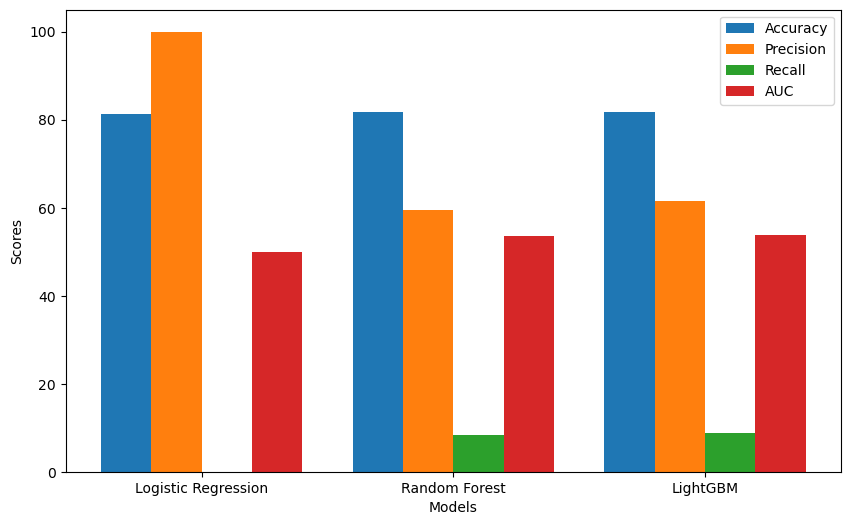

In [206]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Logistic Regression', 'Random Forest', 'LightGBM']
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']

# Values
evaluation_metrics = {
    'Logistic Regression': {'Accuracy': LR1_accuracy*100, 'Precision': LR1_precision*100, 'Recall': LR1_recall*100, 'AUC': LR1_auc*100},
    'Random Forest': {'Accuracy': RF1_accuracy*100, 'Precision': RF1_precision*100, 'Recall': RF1_recall*100, 'AUC': RF1_auc*100},
    'LightGBM': {'Accuracy': GBM1_accuracy*100, 'Precision': GBM1_precision*100, 'Recall': GBM1_recall*100, 'AUC': GB1_auc*100}
}

# Create lists to store values for each metric
accuracy_values = []
precision_values = []
recall_values = []
auc_values = []

# Extract metric values for each model
for model in models:
    accuracy_values.append(evaluation_metrics[model]['Accuracy'])
    precision_values.append(evaluation_metrics[model]['Precision'])
    recall_values.append(evaluation_metrics[model]['Recall'])
    auc_values.append(evaluation_metrics[model]['AUC'])

# Create a stacked column chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric for each model as a stacked column
bar_width = 0.2
index = np.arange(len(models))

ax.bar(index, accuracy_values, bar_width, label='Accuracy')
ax.bar(index + bar_width, precision_values, bar_width, label='Precision')
ax.bar(index + 2 * bar_width, recall_values, bar_width, label='Recall')
ax.bar(index + 3 * bar_width, auc_values, bar_width, label='AUC')

# Add labels and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()


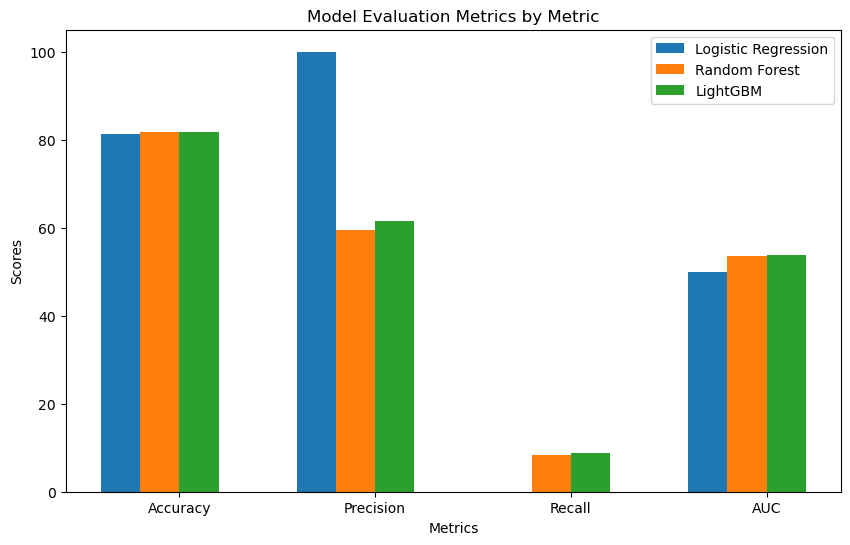

In [210]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Logistic Regression', 'Random Forest', 'LightGBM']
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']

# Values
evaluation_metrics = {
    'Logistic Regression': {'Accuracy': LR1_accuracy*100, 'Precision': LR1_precision*100, 'Recall': LR1_recall*100, 'AUC': LR1_auc*100},
    'Random Forest': {'Accuracy': RF1_accuracy*100, 'Precision': RF1_precision*100, 'Recall': RF1_recall*100, 'AUC': RF1_auc*100},
    'LightGBM': {'Accuracy': GBM1_accuracy*100, 'Precision': GBM1_precision*100, 'Recall': GBM1_recall*100, 'AUC': GB1_auc*100}
}

# Create lists to store values for each model
metric_values = {model: [] for model in models}

# Extract metric values for each model
for model in models:
    for metric in metrics:
        metric_values[model].append(evaluation_metrics[model].get(metric, 0))

# Create a stacked column chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric's values as a separate set of stacked columns
bar_width = 0.2
index = np.arange(len(metrics))

for i, model in enumerate(models):
    ax.bar(index + i * bar_width, metric_values[model], bar_width, label=model)

# Add labels and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()


## Creating training/testing data set for df_2

In [170]:
X2 = df_2.drop(columns=['DEP_DEL15', 'ORIGIN_AIRPORT_NAME', 'DEST_AIRPORT_NAME', 'OP_UNIQUE_CARRIER', 'TAIL_NUM'])  # Features
y2 = df_2['DEP_DEL15']  # Target variable

# Split data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.3, random_state=3)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=3)

### LightGBM

In [171]:
import lightgbm as lgb

# Define LightGBM parameters for grid search
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier()

In [172]:
# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X2_train, y2_train)

# Get the best parameters
GBM2_best_params = grid_search.best_params_



/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [173]:
# Train the model with the best parameters
best_lgb2_model = lgb.LGBMClassifier(**GBM2_best_params)
best_lgb2_model.fit(X2_train, y2_train)

LGBMClassifier(learning_rate=0.2, n_estimators=200, num_leaves=40)

In [189]:
# Predict on the test set
GBM_y2_pred = best_lgb2_model.predict(X2_test)

# Calculate evaluation metrics
GBM2_accuracy = accuracy_score(y2_test, GBM_y2_pred)
GBM2_precision = precision_score(y2_test, GBM_y2_pred)
GBM2_recall = recall_score(y2_test, GBM_y2_pred)
GBM2_f1 = f1_score(y2_test, GBM_y2_pred)
GBM2_mse = mean_squared_error(y2_test, GBM_y2_pred)
GBM2_auc = roc_auc_score(y2_test, GBM_y2_pred)



print("Accuracy:", GBM2_accuracy)
print("Precision:", GBM2_precision)
print("Recall:", GBM2_recall)
print("F1 Score:", GBM2_f1)
print("Mean Squared Error:", GBM2_mse)
print("AUC Score:", GBM2_auc)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X2_train.columns, 'Importance': best_lgb2_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Accuracy: 0.818340531899685
Precision: 0.6157174911849557
Recall: 0.08856460028740269
F1 Score: 0.15485492008679938
Mean Squared Error: 0.18165946810031494
AUC Score: 0.5378870216072271
Feature Importance:
                  Feature  Importance
1            DAY_OF_MONTH         740
2       ORIGIN_AIRPORT_ID         661
3         DEST_AIRPORT_ID         594
0                   MONTH         551
4                  O_AWND         497
41         TAIL_NUM_STAND         470
40  OP_UNIQUE_CARRIER_NUM         446
22                 D_AWND         408
9                  O_TMAX         374
10                 O_TMIN         360
27                 D_TMAX         358
23                 D_PRCP         356
8                  O_TAVG         333
5                  O_PRCP         322
26                 D_TAVG         322
28                 D_TMIN         310
6                  O_SNOW         124
24                 D_SNOW          88
7                  O_SNWD          62
13                 O_WT03         

### Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression parameters for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize Logistic Regression classifier
lr_model = LogisticRegression()

In [176]:
# Perform grid search
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X2_train, y2_train)

# Get the best parameters
lr2_best_params = grid_search.best_params_



/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [177]:
# Train the model with the best parameters
best_lr2_model = LogisticRegression(**lr2_best_params)
best_lr2_model.fit(X2_train, y2_train)

/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [191]:
# Predict on the test set
LR_y2_pred = best_lr2_model.predict(X2_test)

# Calculate evaluation metrics
LR2_accuracy = accuracy_score(y2_test, LR_y2_pred)
LR2_precision = precision_score(y2_test, LR_y2_pred)
LR2_recall = recall_score(y2_test, LR_y2_pred)
LR2_f1 = f1_score(y2_test, LR_y2_pred)
LR2_mse = mean_squared_error(y2_test, LR_y2_pred)
LR2_auc = roc_auc_score(y2_test, LR_y2_pred)


print("Accuracy:", LR2_accuracy)
print("Precision:", LR2_precision)
print("Recall:", LR2_recall)
print("F1 Score:", LR2_f1)
print("Mean Squared Error:", LR2_mse)
print("AUC Score:", LR2_auc)


# Coefficients of features
coefficients = best_lr2_model.coef_[0]
feature_names = X2_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print("Feature Coefficients:")
print(coef_df)

Accuracy: 0.8120863712438574
Precision: 1.0
Recall: 7.684564016260538e-06
F1 Score: 1.5369009928380415e-05
Mean Squared Error: 0.18791362875614262
AUC Score: 0.5000038422820081
Feature Coefficients:
                  Feature   Coefficient
22                 D_AWND  2.622333e-02
28                 D_TMIN  2.153068e-02
4                  O_AWND  2.095164e-02
10                 O_TMIN  1.931828e-02
11                 O_WT01  8.943422e-03
13                 O_WT03  8.469812e-03
29                 D_WT01  7.627318e-03
6                  O_SNOW  7.521515e-03
7                  O_SNWD  7.286500e-03
31                 D_WT03  7.284687e-03
5                  O_PRCP  6.855553e-03
23                 D_PRCP  6.304400e-03
1            DAY_OF_MONTH  5.225113e-03
25                 D_SNWD  5.123741e-03
26                 D_TAVG  5.011207e-03
8                  O_TAVG  4.882705e-03
24                 D_SNOW  4.255983e-03
18                 O_WT08  1.927542e-03
12                 O_WT02  1.763086e-03
3

### Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()


In [180]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X2_train, y2_train)

# Get the best parameters
rf2_best_params = grid_search.best_params_



/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [181]:
# Train the model with the best parameters
best_rf2_model = RandomForestClassifier(**rf2_best_params)
best_rf2_model.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [192]:
# Predict on the test set
RF2_y2_pred = best_rf2_model.predict(X2_test)

# Calculate evaluation metrics
RF2_accuracy = accuracy_score(y2_test, RF2_y2_pred)
RF2_precision = precision_score(y2_test, RF2_y2_pred)
RF2_recall = recall_score(y2_test, RF2_y2_pred)
RF2_f1 = f1_score(y2_test, RF2_y2_pred)
RF2_mse = mean_squared_error(y1_test, RF2_y2_pred)
RF2_auc = roc_auc_score(y2_test, RF2_y2_pred)


print("Accuracy:", RF2_accuracy)
print("Precision:", RF2_precision)
print("Recall:", RF2_recall)
print("F1 Score:", RF2_f1)
print("Mean Squared Error:", RF2_mse)
print("AUC Score:", RF2_auc)


# Feature importance
feature_importance = pd.DataFrame({'Feature': X2_train.columns, 'Importance': best_rf2_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Accuracy: 0.8172084003009391
Precision: 0.5970778154755391
Recall: 0.08384627798141872
F1 Score: 0.1470435632222634
Mean Squared Error: 0.18279159969906095
AUC Score: 0.5353767138740597
Feature Importance:
                  Feature  Importance
41         TAIL_NUM_STAND    0.090466
5                  O_PRCP    0.069764
23                 D_PRCP    0.063212
22                 D_AWND    0.058540
3         DEST_AIRPORT_ID    0.053579
4                  O_AWND    0.053152
9                  O_TMAX    0.050281
2       ORIGIN_AIRPORT_ID    0.048267
1            DAY_OF_MONTH    0.047224
27                 D_TMAX    0.046568
40  OP_UNIQUE_CARRIER_NUM    0.045649
10                 O_TMIN    0.045629
8                  O_TAVG    0.044974
28                 D_TMIN    0.044726
26                 D_TAVG    0.043848
0                   MONTH    0.031714
13                 O_WT03    0.030505
6                  O_SNOW    0.028839
31                 D_WT03    0.021728
11                 O_WT01    0.015

In [183]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load your dataset
# Assuming you have your dataset loaded into a pandas DataFrame named 'data'
# Each row represents a transaction, and each column represents an item

# Convert the data into a binary format suitable for Apriori
def encode_data(df_1):
    # Convert categorical data into binary format (one-hot encoding)
    encoded_data = pd.get_dummies(df_1)
    return encoded_data

# Encode the data
encoded_data = encode_data(df_1)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(encoded_data, min_support=0.1, use_colnames=True)

# Generate association rules
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
print("Association Rules:")
print(association_rules)


/Users/geordy/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 5.0